In [1]:
import math
from matplotlib import pyplot as plt

In [2]:
TrainingSet=[{'x':-6.7602539670,'y':-2.4387523460,'N3':0},
             {'x':0.2378982210,'y':-8.2276742330,'N3':0},
             {'x':2.0094936980, 'y':0.6249651720,'N3':0},
             {'x':-9.8509350550, 'y':0.1777744150,'N3':0},
             {'x':-1.0748279990, 'y':-8.6737909960,'N3':0},
             {'x':-1.1968678340, 'y':8.3407572130,'N3':0},
             {'x':7.6367881760, 'y':9.7875379540,'N3':0},
             {'x':-0.6319729550, 'y':5.1232197830,'N3':0},
             {'x':-8.2754243970, 'y':-2.3798495030,'N3':0},
             {'x':-0.1986448540, 'y':-8.7164672830,'N3':0},
             {'x':-8.4873501930,'y':-6.6645671410,'N3':0},
             {'x':4.2828037150, 'y':9.9602949050,'N3':0},
             {'x':0.6953739670, 'y':7.2005364870,'N3':0},
             {'x':-3.9462956950, 'y':-5.0715989040,'N3':0},
             {'x':1.8548584640, 'y':-3.6475279180,'N3':1},
             {'x':5.3674101120, 'y':-5.9137418930,'N3':1},
             {'x':1.5922647610, 'y':-0.5358552360,'N3':1},
             {'x':-0.8892370090, 'y':1.8587602300,'N3':1},
             {'x':8.5913808400, 'y':-8.9701288220,'N3':1},
             {'x':1.2633234570, 'y':-1.8066350900,'N3':1},
             {'x':-7.4103478260, 'y':5.6418249780,'N3':1}]

In [3]:
net=[
        [['x',0],['y',0]],
        [
            [
                ['N1',[['w10',1],['w11', 'x'],['w12','y']],0,0], 
                ['N2',[['w20',1],['w21','x'],['w22','y']],0,0]
            ],
            [
                ['N3',[['w30',1],['w31','N1'],['w32','N2']],0,0]
            ]
        ]
    ]

initVals={'w10':0.4, 'w11':1.4, 'w12':1.0,
          'w20':-1.5, 'w21':1.0, 'w22':-0.5,
          'w30':5.4, 'w31':-8.0, 'w32':-10.0} 

In [4]:
def initNet(net,initVals):
    
    for i in range(0,len(net[1])):
        for n in range(len(net[1][i])):
            for w in range(len(net[1][i][n][1])):
                net[1][i][n][1][w][0]=initVals[net[1][i][n][1][w][0]]
                 
initNet(net,initVals)

In [5]:
def setInputs(net,TS,ind):
    v=TS[ind]
   # print(v)
    for i in range(len(net[0])):
   #     print(net[0][i][0])
        net[0][i][1] = v[net[0][i][0]]
          
setInputs(net,TrainingSet,0)

In [6]:
#setWeights
def setWeights(net):

    net[1][0][0][1][1][1] = net[0][0][1]
    net[1][0][1][1][1][1] = net[0][0][1]
    net[1][0][0][1][2][1] = net[0][1][1]
    net[1][0][1][1][2][1] = net[0][1][1]
        
setWeights(net)

In [7]:
#MultPesos
def sumPesos(net):
    
    sum_of_weight=[]
    for w in range(len(net[1][0])):
    #    print(net[1][0][w])
        for i in range(len(net[1][0][w][1])):
    #        print(net[1][0][w][1][i])
            sum_of_weight.append(net[1][0][w][1][i][0] * net[1][0][w][1][i][1])
            
    return sum_of_weight
                             
#sumPesos(net)

In [8]:
#O1,O2
def out12(net):

    pesos = sumPesos(net)
    a = sum(pesos[0:3])
    b = sum(pesos[3:7])

    net[1][0][0][2]= 1/(1+math.exp(-a))
    net[1][0][1][2]= 1/(1+math.exp(-b))
    
    #replace dos n1,n2 no n3
    net[1][1][0][1][1][1] = net[1][0][0][2]
    net[1][1][0][1][2][1] = net[1][0][1][2]

out12(net)

In [9]:
#O3
def out3(net):

    sum_of_weight_N3=[]

    for i in range(len(net[1][1][0][1])):
    #    print(net[1][1][0][1][i])
        sum_of_weight_N3.append(net[1][1][0][1][i][0] * net[1][1][0][1][i][1])
    #    print(sum_of_weight_N3)   

    a = sum(sum_of_weight_N3)
    net[1][1][0][2]= 1/(1+math.exp(-a))
    
out3(net)

In [10]:
def deltas(net,TS,ind):
    v=TS[ind]
    # print(v[net[1][1][0][0]])
    target = v[net[1][1][0][0]]
    
#delta3
    net[1][1][0][3] = net[1][1][0][2]*(1-net[1][1][0][2])*(target-(net[1][1][0][2]))
#delta1
    net[1][0][0][3] = net[1][0][0][2]*(1-net[1][0][0][2])*net[1][1][0][1][1][0]*net[1][1][0][3]
#delta2
    net[1][0][1][3] = net[1][0][1][2]*(1-net[1][0][1][2])*net[1][1][0][1][2][0]*net[1][1][0][3]

deltas(net,TrainingSet,0)

In [11]:
def newWeights(net):

    for i in range(len(net[1])):

        for j in range(len(net[1][i])):
        #    print(net[1][i][j])
            for k in range(len(net[1][i][j][1])):
        #        print(net[1][i][j][1][k][0])
                net[1][i][j][1][k][0] = net[1][i][j][1][k][0] + 0.1 * net[1][i][j][3] * net[1][i][j][1][k][1]

newWeights(net)

Erros: 11


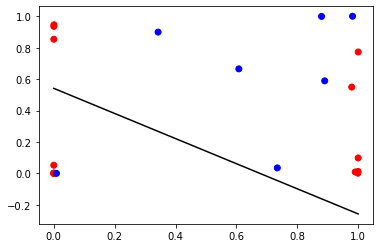

Erros: 0


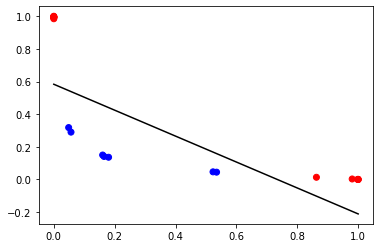

In [12]:
def grafico(net,ts,n):

    #grafico de decisão efetuado pelo neuronio da camada de saida (N3) relancionando as suas entradas (N1,N2)
        
    for c in range(n):
        x=[]
        y=[]
        colors=[]
        res=[]
        n_erros = 0
        
        for d in range(len(ts)):
            
            if ts[d][net[1][1][0][0]]==0:
                colors.append('r')
            else:
                colors.append('b')
            
            setInputs(net,TrainingSet,d)
            setWeights(net)                              
            sumPesos(net)    
            out12(net)    
            out3(net)
            deltas(net,TrainingSet,d)
            newWeights(net)
            x.append(net[1][0][0][2])
            y.append(net[1][0][1][2])
            res.append(1 if net[1][1][0][2]>0.5 else 0)
            
            if ts[d][net[1][1][0][0]] != res[d]:
                n_erros +=1
        
        if c==n-1 or c==0:
            
            plt.scatter(x,y,color=colors)
            print('Erros:',n_erros)

            w0 = net[1][1][0][1][0][0]
            w1 = net[1][1][0][1][1][0]
            w2 = net[1][1][0][1][2][0]

            x1=0
            x2=1
            y1=((-w1/w2)*x1)-w0/w2
            y2=((-w1/w2)*x2)-w0/w2


            plt.plot([x1,x2],[y1,y2],"-k")  
            plt.show()

grafico(net,TrainingSet,120)